In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("dataset/", one_hot=True)

Extracting dataset/train-images-idx3-ubyte.gz
Extracting dataset/train-labels-idx1-ubyte.gz
Extracting dataset/t10k-images-idx3-ubyte.gz
Extracting dataset/t10k-labels-idx1-ubyte.gz


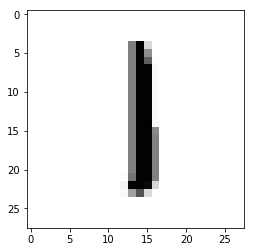

In [5]:
plt.imshow(mnist.train.images[12].reshape(28,28), cmap='Greys')

In [6]:
def generator(z, reuse=None):
    with tf.variable_scope('gen', reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z, units=128)
        
        alpha = 0.1
        hidden1 = tf.maximum(hidden1, alpha * hidden1)
        hidden2 = tf.layers.dense(inputs=hidden1, units=128)
        hidden2 = tf.maximum(hidden2, alpha * hidden2)
        output = tf.layers.dense(inputs=hidden2, units=784, activation=tf.nn.tanh)

        return output

In [7]:
def discriminator(X, reuse=None):
    with tf.variable_scope('dis', reuse=reuse):
        hidden1 = tf.layers.dense(inputs=X, units=128)
        
        alpha = 0.1
        hidden1 = tf.maximum(hidden1, alpha * hidden1)
        hidden2 = tf.layers.dense(inputs=hidden1, units=128)
        hidden2 = tf.maximum(hidden2, alpha * hidden2)

        logits = tf.layers.dense(inputs=hidden2, units=1)
        output = tf.sigmoid(logits)

        return output, logits

In [8]:
real_images = tf.placeholder(tf.float32, shape=[None, 784])
z = tf.placeholder(tf.float32, shape=[None, 100])

In [9]:
G=generator(z)

In [10]:
D_output_real, D_logits_real = discriminator(real_images)

In [11]:
D_output_fake, D_logits_fake = discriminator(G, reuse=True)

In [12]:
# Losses
def loss(logits_in, labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in, labels=labels_in))
smoothing_factor = 0.9

In [13]:
D_real_loss = loss(D_logits_real, tf.ones_like(D_logits_real) * smoothing_factor)
D_fake_loss = loss(D_logits_fake, tf.zeros_like(D_logits_fake))

In [14]:
D_loss = D_real_loss + D_fake_loss

In [15]:
G_loss = loss(D_logits_fake, tf.ones_like(D_logits_fake))

In [19]:
learning_rate = 0.001

In [20]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

In [21]:
D_trainer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate).minimize(D_loss, var_list=d_vars)
G_trainer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate).minimize(G_loss, var_list=g_vars)

In [27]:
batch_size = 100

In [24]:
epochs = 30

In [25]:
init = tf.global_variables_initializer()

In [26]:
samples = []

In [28]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        num_baches = mnist.train.num_examples // batch_size
        for i in range(num_baches):
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images * 2 - 1
            
            batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))
            _ = sess.run(D_trainer, feed_dict = {real_images: batch_images, z: batch_z})
            _ = sess.run(G_trainer, feed_dict = {z: batch_z})
            
        print("On epoch: {}".format(epoch))
        sample_z = np.random.uniform(-1, 1, size=(1, 100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict = {z: sample_z})
        
        samples.append(gen_sample)

On epoch: 0
On epoch: 1
On epoch: 2
On epoch: 3
On epoch: 4
On epoch: 5
On epoch: 6
On epoch: 7
On epoch: 8
On epoch: 9
On epoch: 10
On epoch: 11
On epoch: 12
On epoch: 13
On epoch: 14
On epoch: 15
On epoch: 16
On epoch: 17
On epoch: 18
On epoch: 19
On epoch: 20
On epoch: 21
On epoch: 22
On epoch: 23
On epoch: 24
On epoch: 25
On epoch: 26
On epoch: 27
On epoch: 28
On epoch: 29
